# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [5]:
cloud_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'cloudy' in i]
rain_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'rain' in i]
sunrise_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'sunrise' in i]
sunshine_set = ['data/weather_data/{}'.format(i) for i in os.listdir('data/weather_data') if 'shine' in i]

In [6]:
cloud_set

['data/weather_data/cloudy126.jpg',
 'data/weather_data/cloudy132.jpg',
 'data/weather_data/cloudy23.jpg',
 'data/weather_data/cloudy37.jpg',
 'data/weather_data/cloudy250.jpg',
 'data/weather_data/cloudy244.jpg',
 'data/weather_data/cloudy278.jpg',
 'data/weather_data/cloudy293.jpg',
 'data/weather_data/cloudy287.jpg',
 'data/weather_data/cloudy286.jpg',
 'data/weather_data/cloudy292.jpg',
 'data/weather_data/cloudy279.jpg',
 'data/weather_data/cloudy245.jpg',
 'data/weather_data/cloudy251.jpg',
 'data/weather_data/cloudy36.jpg',
 'data/weather_data/cloudy22.jpg',
 'data/weather_data/cloudy133.jpg',
 'data/weather_data/cloudy127.jpg',
 'data/weather_data/cloudy131.jpg',
 'data/weather_data/cloudy125.jpg',
 'data/weather_data/cloudy119.jpg',
 'data/weather_data/cloudy34.jpg',
 'data/weather_data/cloudy20.jpg',
 'data/weather_data/cloudy247.jpg',
 'data/weather_data/cloudy253.jpg',
 'data/weather_data/cloudy284.jpg',
 'data/weather_data/cloudy290.jpg',
 'data/weather_data/cloudy9.jpg',


In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['data/weather_data/cloudy287.jpg',
 'data/weather_data/cloudy281.jpg',
 'data/weather_data/cloudy16.jpg',
 'data/weather_data/cloudy140.jpg',
 'data/weather_data/cloudy151.jpg',
 'data/weather_data/cloudy84.jpg',
 'data/weather_data/cloudy92.jpg',
 'data/weather_data/cloudy29.jpg',
 'data/weather_data/cloudy283.jpg',
 'data/weather_data/cloudy224.jpg',
 'data/weather_data/cloudy66.jpg',
 'data/weather_data/cloudy285.jpg',
 'data/weather_data/cloudy45.jpg',
 'data/weather_data/cloudy144.jpg',
 'data/weather_data/cloudy292.jpg',
 'data/weather_data/cloudy180.jpg',
 'data/weather_data/cloudy67.jpg',
 'data/weather_data/cloudy128.jpg',
 'data/weather_data/cloudy123.jpg',
 'data/weather_data/cloudy240.jpg',
 'data/weather_data/cloudy243.jpg',
 'data/weather_data/cloudy161.jpg',
 'data/weather_data/cloudy95.jpg',
 'data/weather_data/cloudy118.jpg',
 'data/weather_data/cloudy181.jpg',
 'data/weather_data/cloudy93.jpg',
 'data/weather_data/cloudy120.jpg',
 'data/weather_data/cloudy225.jpg',
 

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[:150] + sunshine_set[:150]

In [10]:
train_set

['data/weather_data/cloudy287.jpg',
 'data/weather_data/cloudy281.jpg',
 'data/weather_data/cloudy16.jpg',
 'data/weather_data/cloudy140.jpg',
 'data/weather_data/cloudy151.jpg',
 'data/weather_data/cloudy84.jpg',
 'data/weather_data/cloudy92.jpg',
 'data/weather_data/cloudy29.jpg',
 'data/weather_data/cloudy283.jpg',
 'data/weather_data/cloudy224.jpg',
 'data/weather_data/cloudy66.jpg',
 'data/weather_data/cloudy285.jpg',
 'data/weather_data/cloudy45.jpg',
 'data/weather_data/cloudy144.jpg',
 'data/weather_data/cloudy292.jpg',
 'data/weather_data/cloudy180.jpg',
 'data/weather_data/cloudy67.jpg',
 'data/weather_data/cloudy128.jpg',
 'data/weather_data/cloudy123.jpg',
 'data/weather_data/cloudy240.jpg',
 'data/weather_data/cloudy243.jpg',
 'data/weather_data/cloudy161.jpg',
 'data/weather_data/cloudy95.jpg',
 'data/weather_data/cloudy118.jpg',
 'data/weather_data/cloudy181.jpg',
 'data/weather_data/cloudy93.jpg',
 'data/weather_data/cloudy120.jpg',
 'data/weather_data/cloudy225.jpg',
 

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

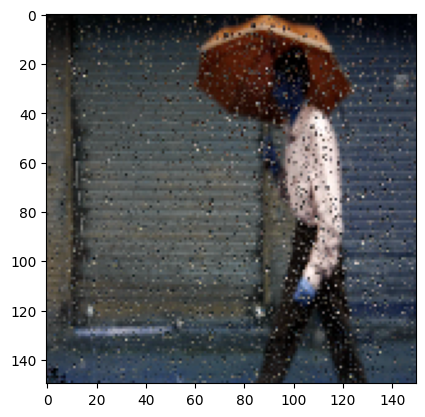

In [12]:
# Display some images
idx = 200
image = train_set[idx]
# image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [13]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)


<Axes: xlabel='code', ylabel='count'>

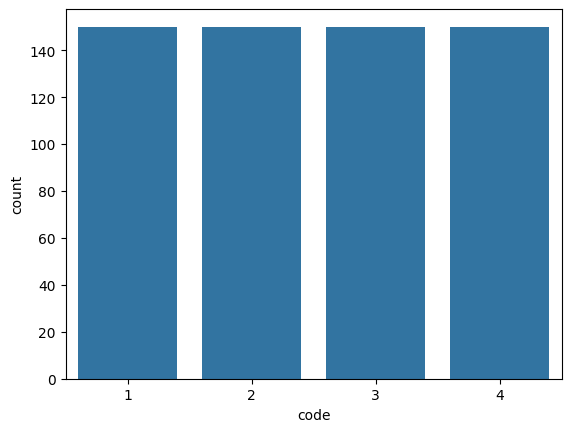

In [14]:
# y_train =[1,3,3,4,2,1]
# sns.countplot(y_train)
sns.countplot(x = "code", data = pd.DataFrame({'code' : y_train}))

In [15]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

[0. 1. 0. 0. 0.]


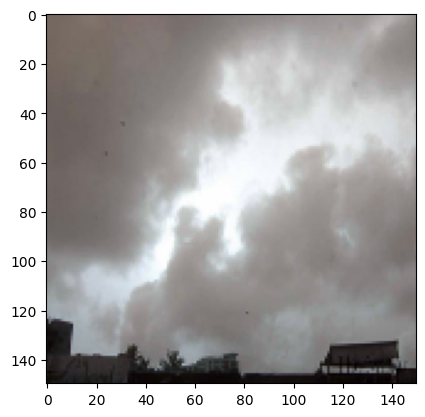

In [17]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [18]:
import tensorflow as tf
import os
import numpy as np
import random

SEED = 4000

#Function to initialize seeds for all libraries which might have stochastic behavior
def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

# Activate Tensorflow deterministic behavior
def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [19]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

In [21]:
# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((600, 150, 150, 3), (600, 5), (514, 150, 150, 3), (514, 5))

In [22]:
# 14.) Compile and Train the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

In [21]:
from tensorflow.keras import metrics

dir(metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'F1Score',
 'FBetaScore',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'R2Score',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__n

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 221.1969 - recall: 0.4187 - precision: 0.4196 - accuracy: 0.4187
Epoch 1: accuracy improved from inf to 0.41875, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 23s 3s/step - loss: 221.1969 - recall: 0.4187 - precision: 0.4196 - accuracy: 0.4187 - val_loss: 87.1526 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 7.6736 - recall: 0.6333 - precision: 0.6414 - accuracy: 0.6375
Epoch 2: accuracy did not improve from 0.41875
8/8 [==============================] - 21s 3s/step - loss: 7.6736 - recall: 0.6333 - precision: 0.6414 - accuracy: 0.6375 - val_loss: 5.4161 - val_recall: 0.2583 - val_precision: 0.2605 - val_accuracy: 0.2583
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.8323 - recall: 0.7354 - precision: 0.7879 - accuracy: 0.7604
Epoch 3: accuracy did not improve from 0.41875
8/8 [==============================] - 21s 3s/step - loss: 0.8323 - recall: 0.7354 - precision: 0.7879 - accuracy: 0.7604 - val_loss: 2.9870 - val_recall: 0.0333 - val_precision: 0.0889 - val_accuracy: 0.0917
Epoc

### Plot learning Curves

***Type your code here***

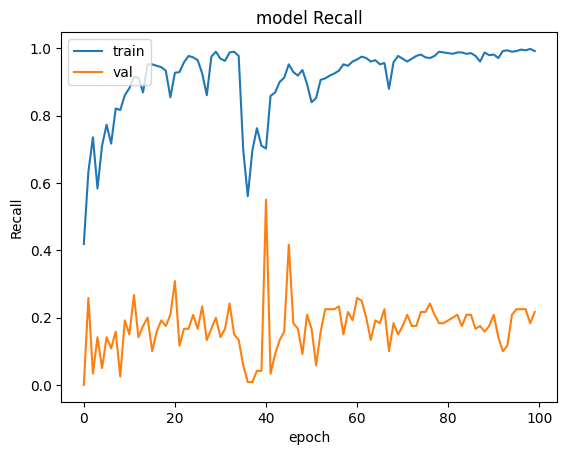

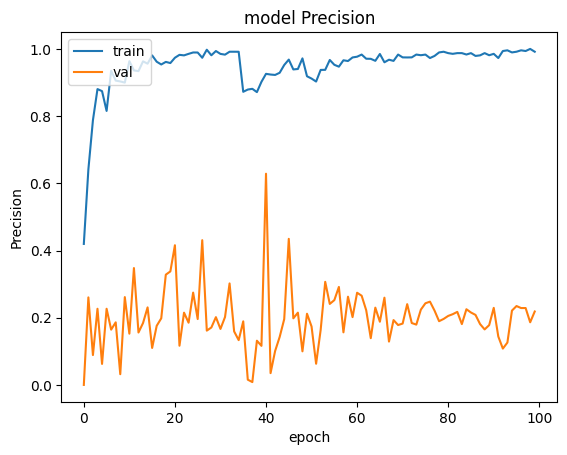

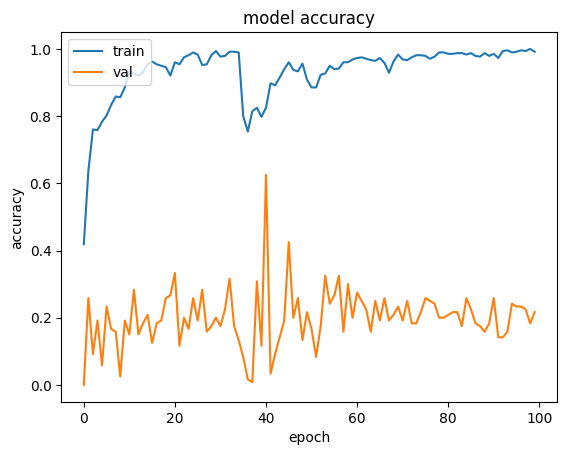

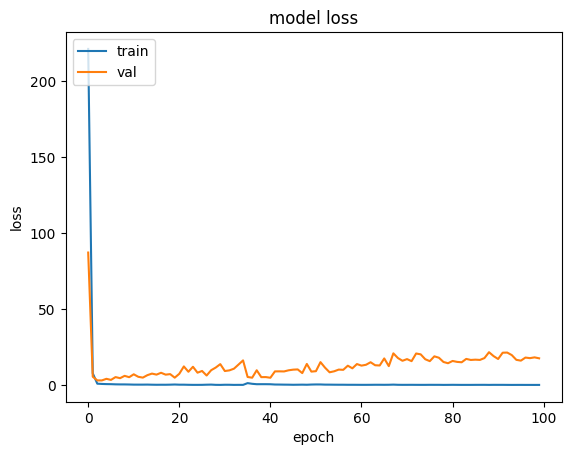

In [23]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Evaluating the model out-of-sample

In [24]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 7s 404ms/step - loss: 27.8210 - recall: 0.5195 - precision: 0.5195 - accuracy: 0.5195
Test accuracy: 0.519
Test recall: 0.519
Test precision: 0.519


# Vanilla dropout 0.2 

In [25]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.2)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       7385

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 227.4641 - recall: 0.4646 - precision: 0.4646 - accuracy: 0.4646
Epoch 1: accuracy improved from inf to 0.46458, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 24s 3s/step - loss: 227.4641 - recall: 0.4646 - precision: 0.4646 - accuracy: 0.4646 - val_loss: 73.0301 - val_recall: 0.0333 - val_precision: 0.0333 - val_accuracy: 0.0333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 11.9788 - recall: 0.6479 - precision: 0.6479 - accuracy: 0.6479
Epoch 2: accuracy did not improve from 0.46458
8/8 [==============================] - 22s 3s/step - loss: 11.9788 - recall: 0.6479 - precision: 0.6479 - accuracy: 0.6479 - val_loss: 11.7873 - val_recall: 0.5417 - val_precision: 0.5417 - val_accuracy: 0.5417
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 3.5680 - recall: 0.7583 - precision: 0.7599 - accuracy: 0.7583
Epoch 3: accuracy did not improve from 0.46458
8/8 [==============================] - 22s 3s/step - loss: 3.5680 - recall: 0.7583 - precision: 0.7599 - accuracy: 0.7583 - val_loss: 12.1900 - val_recall: 0.2083 - val_precision: 0.2083 - val_accuracy: 0.2083
Epoch 4/100


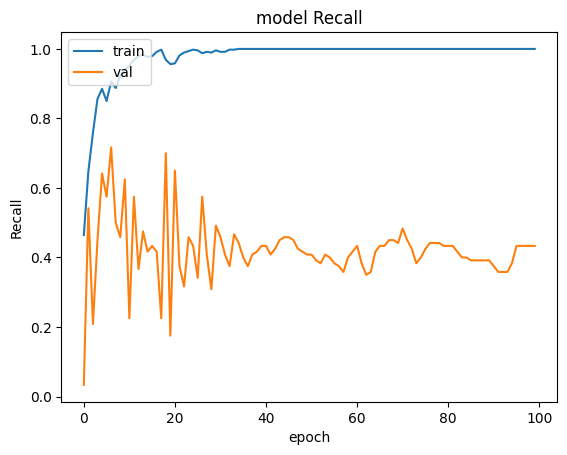

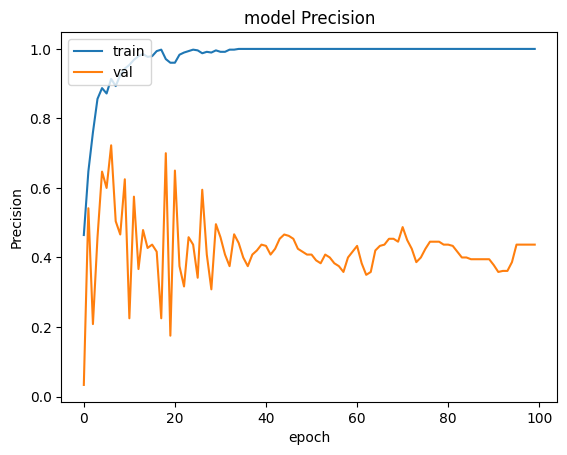

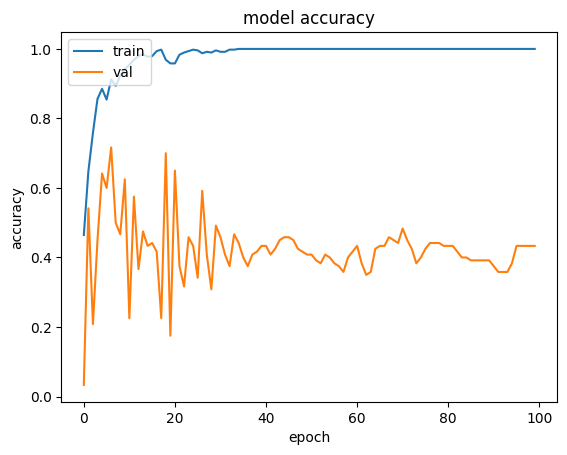

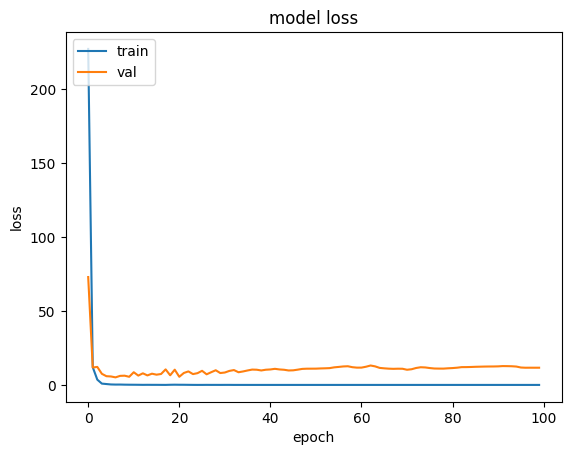

In [27]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Evaluating the model out-of-sample

In [28]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 7s 381ms/step - loss: 36.0122 - recall: 0.4708 - precision: 0.4708 - accuracy: 0.4708
Test accuracy: 0.471
Test recall: 0.471
Test precision: 0.471


# Vanilla dropout 0.8

In [29]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.8)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       7385

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 143.9572 - recall: 0.3333 - precision: 0.3333 - accuracy: 0.3333
Epoch 1: accuracy improved from inf to 0.33333, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 23s 3s/step - loss: 143.9572 - recall: 0.3333 - precision: 0.3333 - accuracy: 0.3333 - val_loss: 119.5061 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 8.9266 - recall: 0.6708 - precision: 0.6708 - accuracy: 0.6708
Epoch 2: accuracy did not improve from 0.33333
8/8 [==============================] - 21s 3s/step - loss: 8.9266 - recall: 0.6708 - precision: 0.6708 - accuracy: 0.6708 - val_loss: 21.4559 - val_recall: 0.1583 - val_precision: 0.1597 - val_accuracy: 0.1583
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 2.0058 - recall: 0.7563 - precision: 0.7563 - accuracy: 0.7563
Epoch 3: accuracy did not improve from 0.33333
8/8 [==============================] - 21s 3s/step - loss: 2.0058 - recall: 0.7563 - precision: 0.7563 - accuracy: 0.7563 - val_loss: 12.3301 - val_recall: 0.1250 - val_precision: 0.1250 - val_accuracy: 0.1250
E

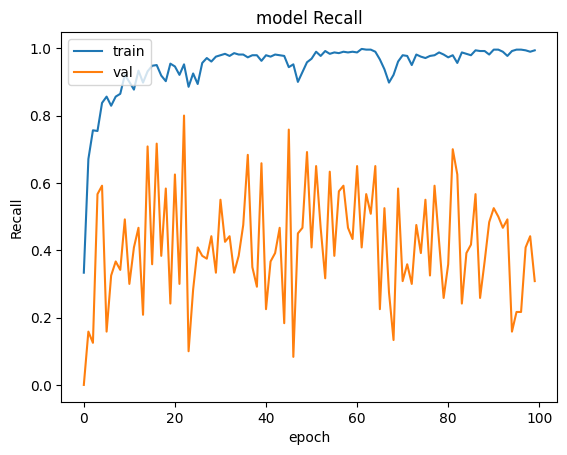

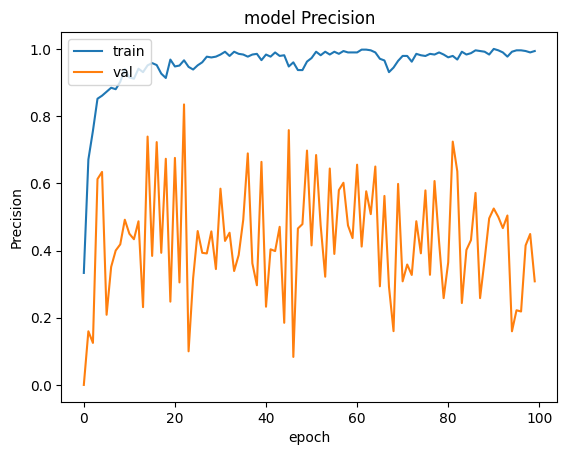

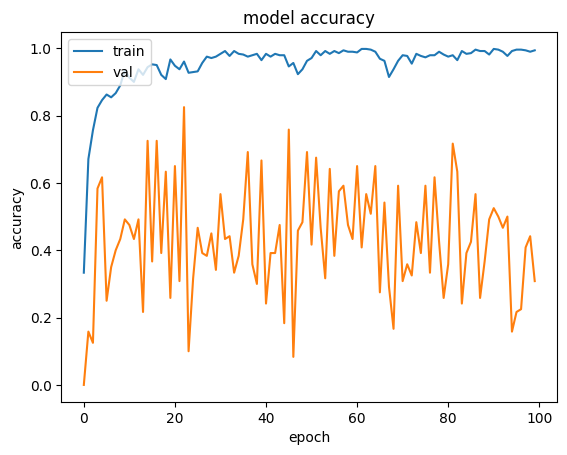

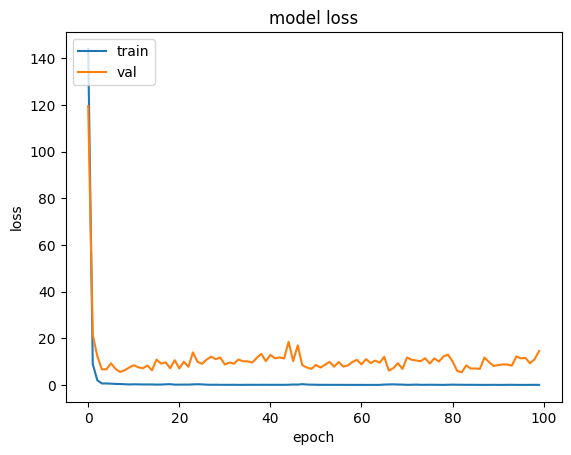

In [33]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    # plt.xlim(left=1)  # Start from 1, you can change it to 2 if desired
    plt.show()

In [34]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 7s 381ms/step - loss: 37.6917 - recall: 0.5292 - precision: 0.5292 - accuracy: 0.5292
Test accuracy: 0.529
Test recall: 0.529
Test precision: 0.529


# Model 1 with No dropout

In [35]:
# for color images, may need to scale and normalize the inputs
inputs = layers.Input(shape=(150, 150, 3))
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model1 = Model(inputs=inputs, outputs=outputs)
print(model1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        1846

In [36]:
filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model1.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 87.9488 - recall: 0.2583 - precision: 0.2583 - accuracy: 0.2583
Epoch 1: accuracy improved from inf to 0.25833, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 58s 7s/step - loss: 87.9488 - recall: 0.2583 - precision: 0.2583 - accuracy: 0.2583 - val_loss: 42.5034 - val_recall: 0.0083 - val_precision: 0.0083 - val_accuracy: 0.0083
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 14.7437 - recall: 0.5083 - precision: 0.5083 - accuracy: 0.5083
Epoch 2: accuracy did not improve from 0.25833
8/8 [==============================] - 54s 7s/step - loss: 14.7437 - recall: 0.5083 - precision: 0.5083 - accuracy: 0.5083 - val_loss: 6.4706 - val_recall: 0.1167 - val_precision: 0.1207 - val_accuracy: 0.1250
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 2.0738 - recall: 0.6875 - precision: 0.7006 - accuracy: 0.6917
Epoch 3: accuracy did not improve from 0.25833
8/8 [==============================] - 54s 7s/step - loss: 2.0738 - recall: 0.6875 - precision: 0.7006 - accuracy: 0.6917 - val_loss: 6.1909 - val_recall: 0.1500 - val_precision: 0.1651 - val_accuracy: 0.1667
Epoch 4/100
8/8

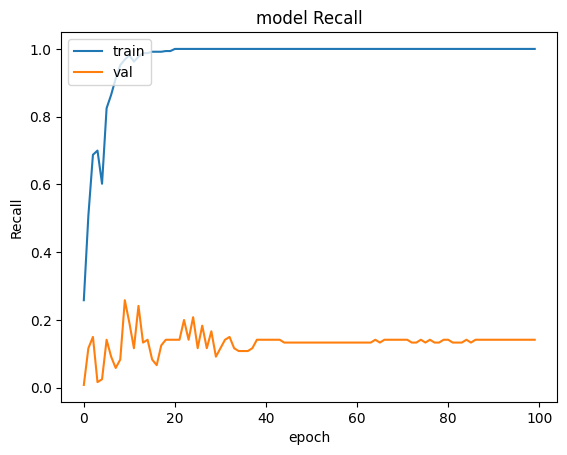

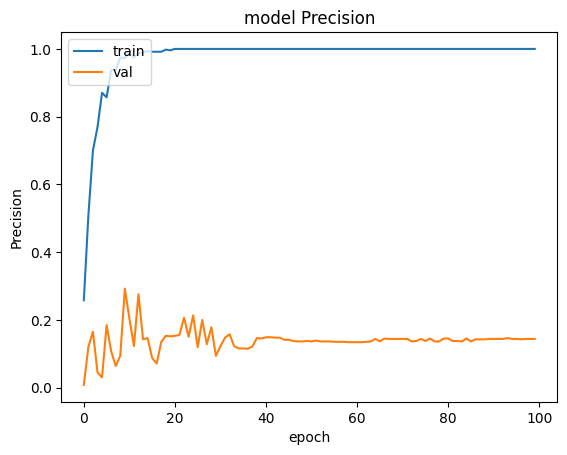

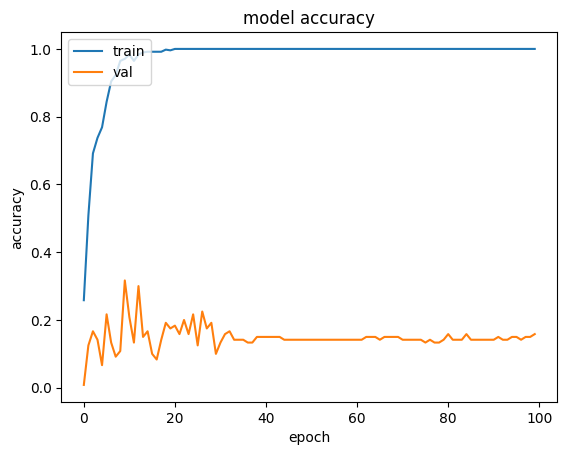

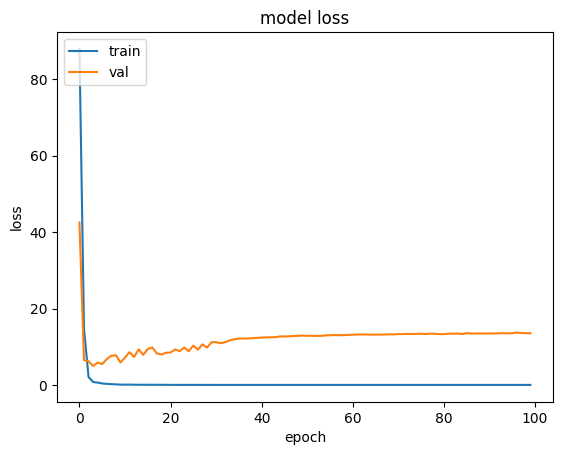

In [37]:
for metric in metrics+['loss']:
    plt.plot(history1.history[metric.lower()])
    plt.plot(history1.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [38]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 16s 906ms/step - loss: 37.9927 - recall: 0.2237 - precision: 0.2242 - accuracy: 0.2257
Test accuracy: 0.226
Test recall: 0.224
Test precision: 0.224


# VGG with dropout 0.5

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = layers.Dropout(.5)(vgg_model.output)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

80134624/80134624 [==============================] - 2s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                            

In [40]:
filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 4.0057 - recall: 0.7521 - precision: 0.7537 - accuracy: 0.7521 
Epoch 1: accuracy improved from inf to 0.75208, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 245s 31s/step - loss: 4.0057 - recall: 0.7521 - precision: 0.7537 - accuracy: 0.7521 - val_loss: 2.5349 - val_recall: 0.8000 - val_precision: 0.8000 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.7610 - recall: 0.9500 - precision: 0.9500 - accuracy: 0.9500 
Epoch 2: accuracy did not improve from 0.75208
8/8 [==============================] - 242s 31s/step - loss: 0.7610 - recall: 0.9500 - precision: 0.9500 - accuracy: 0.9500 - val_loss: 6.8821 - val_recall: 0.4833 - val_precision: 0.4833 - val_accuracy: 0.4833
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.5007 - recall: 0.9729 - precision: 0.9729 - accuracy: 0.9729 
Epoch 3: accuracy did not improve from 0.75208
8/8 [==============================] - 242s 31s/step - loss: 0.5007 - recall: 0.9729 - precision: 0.9729 - accuracy: 0.9729 - val_loss: 7.6888 - val_recall: 0.4667 - val_precision: 0.4667 - val_accuracy: 0.4667
Epoch 4/100

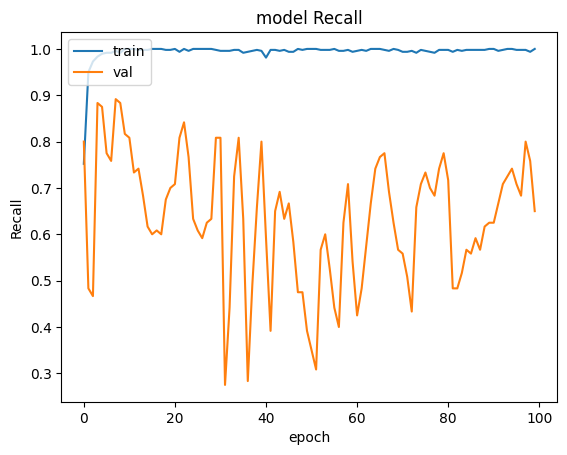

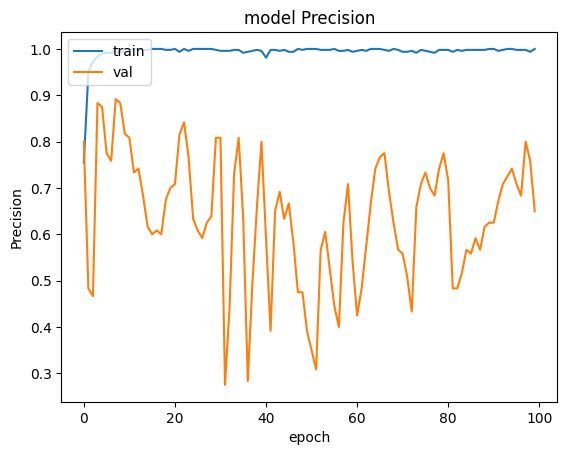

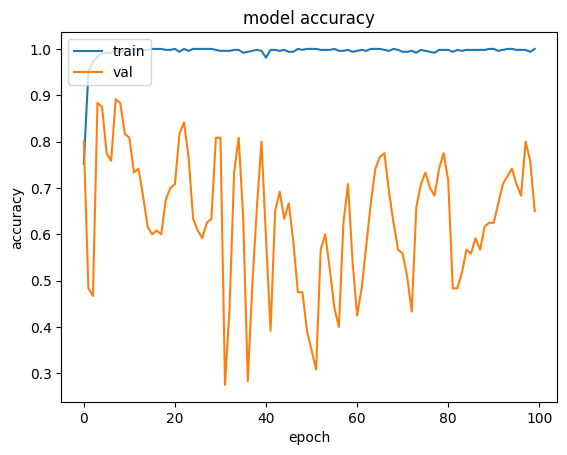

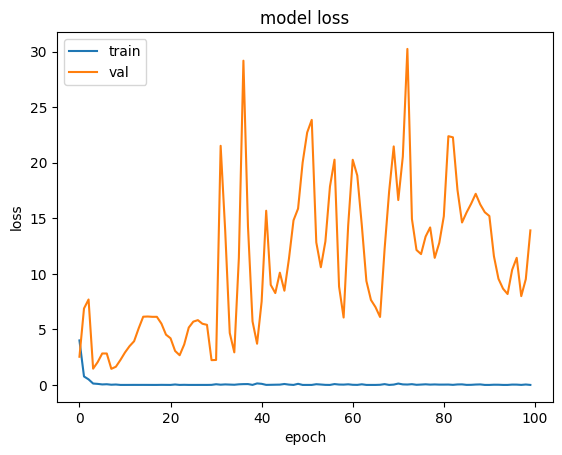

In [42]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [43]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 131s 8s/step - loss: 2.1383 - recall: 0.8580 - precision: 0.8580 - accuracy: 0.8580
Test accuracy: 0.858
Test recall: 0.858
Test precision: 0.858


# VGG without dropout

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [45]:
filepath = 'data/weather_data'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 3.9824 - recall: 0.7146 - precision: 0.7206 - accuracy: 0.7146 
Epoch 1: accuracy improved from inf to 0.71458, saving model to data/weather_data
INFO:tensorflow:Assets written to: data/weather_data/assets


INFO:tensorflow:Assets written to: data/weather_data/assets


8/8 [==============================] - 166s 21s/step - loss: 3.9824 - recall: 0.7146 - precision: 0.7206 - accuracy: 0.7146 - val_loss: 6.0149 - val_recall: 0.6667 - val_precision: 0.6667 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.1598 - recall: 0.9854 - precision: 0.9854 - accuracy: 0.9854 
Epoch 2: accuracy did not improve from 0.71458
8/8 [==============================] - 152s 19s/step - loss: 0.1598 - recall: 0.9854 - precision: 0.9854 - accuracy: 0.9854 - val_loss: 33.3622 - val_recall: 0.2750 - val_precision: 0.2750 - val_accuracy: 0.2750
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.3264 - recall: 0.9833 - precision: 0.9833 - accuracy: 0.9833 
Epoch 3: accuracy did not improve from 0.71458
8/8 [==============================] - 154s 20s/step - loss: 0.3264 - recall: 0.9833 - precision: 0.9833 - accuracy: 0.9833 - val_loss: 14.8327 - val_recall: 0.6250 - val_precision: 0.6250 - val_accuracy: 0.6250
Epoch 4/1

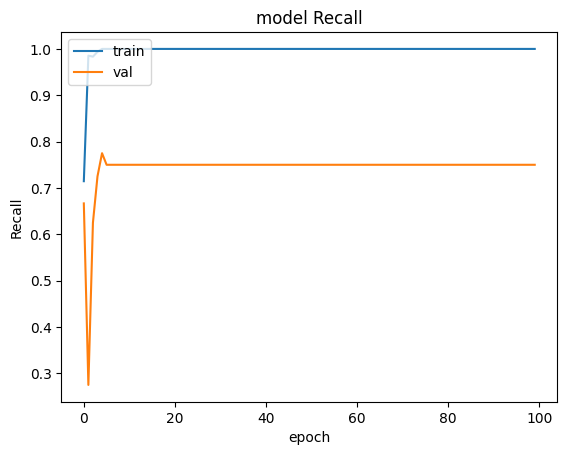

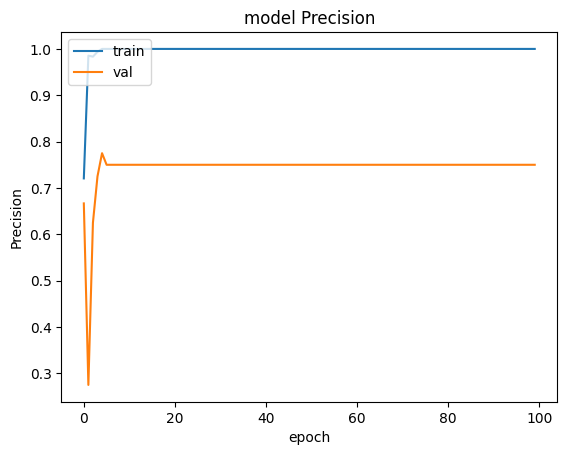

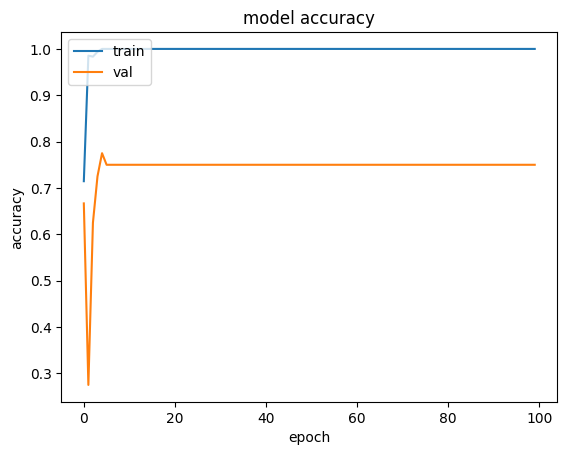

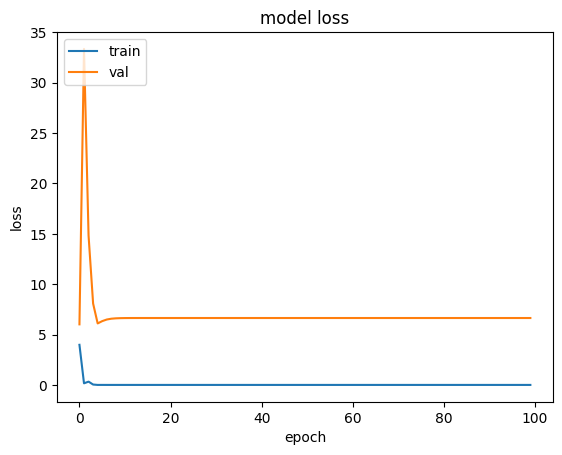

In [46]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [47]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 207s 12s/step - loss: 1.6880 - recall: 0.8911 - precision: 0.8911 - accuracy: 0.8911
Test accuracy: 0.891
Test recall: 0.891
Test precision: 0.891


## VGG no dropout, no early stopping

In [48]:
model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 243s 31s/step - loss: 1.7881e-08 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 6.6435 - val_recall: 0.7417 - val_precision: 0.7417 - val_accuracy: 0.7417
Epoch 2/100
8/8 [==============================] - 242s 31s/step - loss: 7.6989e-09 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 6.6979 - val_recall: 0.7417 - val_precision: 0.7417 - val_accuracy: 0.7417
Epoch 3/100
8/8 [==============================] - 242s 31s/step - loss: 1.2418e-09 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 6.7382 - val_recall: 0.7333 - val_precision: 0.7333 - val_accuracy: 0.7333
Epoch 4/100
8/8 [==============================] - 243s 31s/step - loss: 9.9341e-10 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 6.7779 - val_recall: 0.7250 - val_precision: 0.7250 - val_accuracy: 0.7250
Epoch 5/100
8/8 [==============================] - 242s 31s/step - loss: 7.4506e-10 - recall

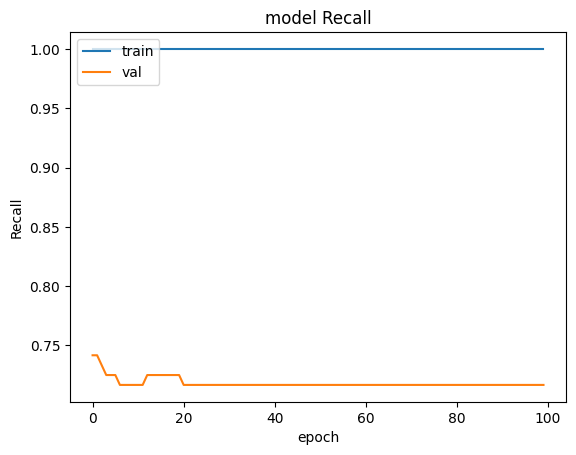

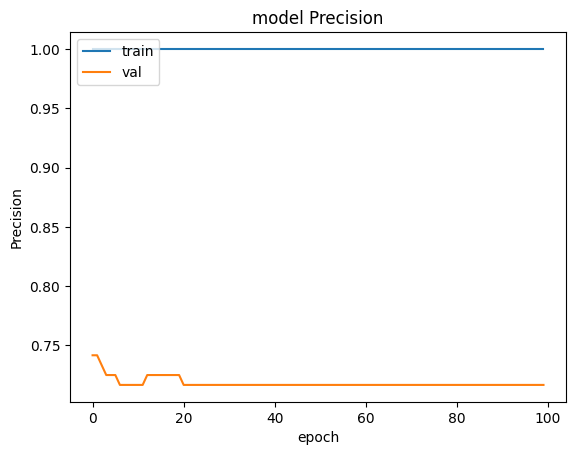

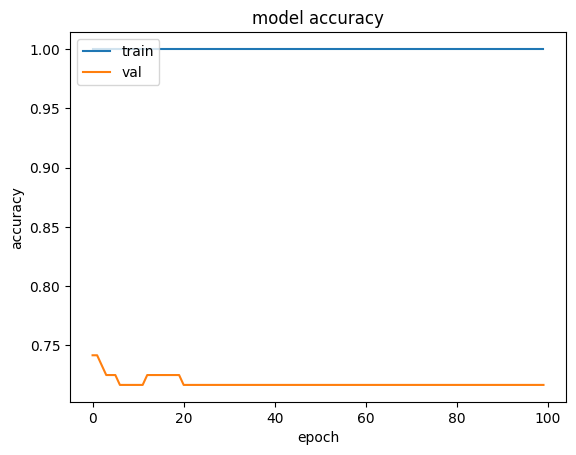

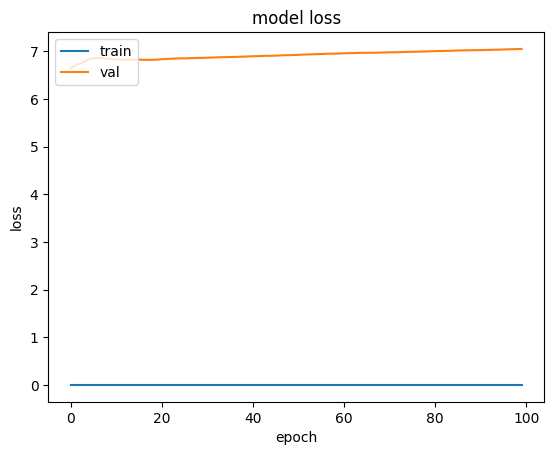

In [50]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [51]:
# Type your code here
test_loss, test_re,test_pr,test_acc = model_vgg.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 126s 7s/step - loss: 1.9354 - recall: 0.9105 - precision: 0.9123 - accuracy: 0.9105
Test accuracy: 0.911
Test recall: 0.911
Test precision: 0.912


### Comment on your results

Regarding the impact of dropout as a regularization technique on the fitted model, there does not appear to be any clear overall advantage in terms of improving model performance on out-of-sample data. Although dropout may help mitigate overfitting, as indicated by the relatively synchronized progression of loss callback curves in Vanilla loss callbacks, my anecdotal experiments suggest otherwise. Contrary to common beliefs in the machine learning community, these experiments indicate that reducing overfitting through regularization may not benefit out-of-sample performance and could even be harmful. In fact, models with fewer regularization measures to counteract overfitting seem to perform better on out-of-sample data.